<a href="https://colab.research.google.com/github/jpcompartir/dl_notebooks/blob/main/linear_classifier_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np

First - define a synthetic data set that is linearly separable.

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [16]:
positive_samples[2, 0:2]

array([4.07871614, 0.49754963])

Two separate arrays of shape 1000,2 - can stack them into a single array of shape 2000,2 with np.vstack()

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

Then we need to generate the labels/targets.

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                     np.ones((num_samples_per_class, 1), dtype = "float32")))

In [25]:
targets.shape[0] == inputs.shape[0]

True

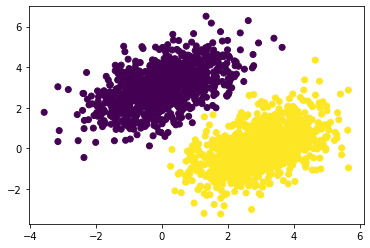

In [26]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Remembering a linear classifier is of the form pred = W * input + b (an affine transformation - geometric transformation that preserves lines &  parallelism, but not necessarily angles, size)

In [28]:
input_dim =2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim, )))

Now the forward pass:

In [32]:
def model(inputs):
  return tf.matmul(inputs,W) + b

Loss function:

In [34]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses) #take the avergae of the loss

Then define the learning rate and the training function. Learning rate will be high because we are running batch training, not mini-batch.

In [37]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

With 50 steps the loss stabilises at around 0.025

In [ ]:
for step in range(50):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss: 4f}")

In [43]:
predictions = model(inputs)
predictions


<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.11265916],
       [ 0.10913518],
       [-0.08092451],
       ...,
       [ 0.9107318 ],
       [ 0.9740132 ],
       [ 0.8966404 ]], dtype=float32)>

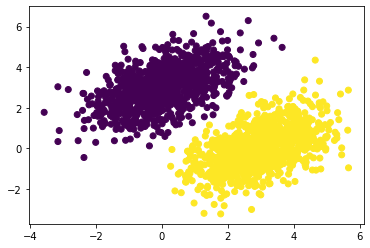

In [44]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:,0] > 0.5)
plt.show()

Now plot with the linear classifier (the line which best separates our target classes)

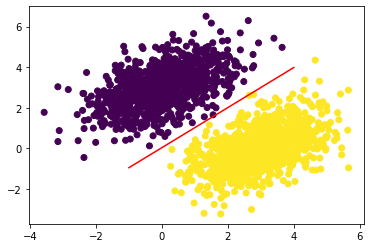

In [46]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()